In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.1 MB 3.5 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 5.8 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 6.1 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 6.0 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    ----------------------------------

In [95]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.metrics import confusion_matrix
from knn import knn

In [96]:
# Load dataset
wine_data = pd.read_csv('C:/Users/BATUHAN/Desktop/ele4/ele489/hm1/wine.data')

In [97]:
# Features and Labels
wine_data.columns = ['Class', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
              'Total Phenols', 'Flavanoids', 'Nonflavanoid Phenols', 'Proanthocyanins',
              'Color Intensity', 'Hue', 'OD280/OD315 of Diluted Wines', 'Proline']

In [105]:
# Normalize features
scaler = MinMaxScaler()
wine_data.iloc[:, 1:] = scaler.fit_transform(wine_data.iloc[:, 1:])

C:\Users\BATUHAN\AppData\Local\Temp\ipykernel_9096\3270932192.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.32608696 0.33695652 0.4673913  0.52173913 0.45652174 0.2826087
 0.55434783 0.29347826 0.30434783 0.38043478 0.27173913 0.20652174
 0.22826087 0.34782609 0.45652174 0.54347826 0.48913043 0.41304348
 0.5        0.60869565 0.34782609 0.33695652 0.27173913 0.2826087
 0.58695652 0.25       0.26086957 0.40217391 0.2826087  0.33695652
 0.39130435 0.36956522 0.67391304 0.43478261 0.32608696 0.43478261
 0.30434783 0.30434783 0.63043478 0.51086957 0.2173913  0.33695652
 0.35869565 0.40217391 0.44565217 0.34782609 0.33695652 0.35869565
 0.41304348 0.23913043 0.26086957 0.44565217 0.48913043 0.52173913
 0.5        0.52173913 0.34782609 0.41304348 0.19565217 0.33695652
 0.32608696 0.26086957 0.18478261 0.36956522 0.30434783 0.08695652
 0.08695652 0.43478261 0.88043478 0.35869565 0.17391304 0.18478261
 0.75       

In [106]:
# Split data 
features = wine_data.iloc[:, 1:].values
label = wine_data.iloc[:, 0].values

In [107]:
# Train test conditions
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=0)

In [108]:
# Distance functions
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))
euclidean_accuracies = []
manhattan_accuracies = []

In [109]:
# K values 1-20
k_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [110]:
# Start algorithm 
for k in k_values:
    label_pred_euclidean = knn(features_train, label_train, features_test, k, euclidean_distance)
    label_pred_manhattan = knn(features_train, label_train, features_test, k, manhattan_distance)
    
    euclidean_accuracies.append(np.mean(label_pred_euclidean == label_test))
    manhattan_accuracies.append(np.mean(label_pred_manhattan == label_test))

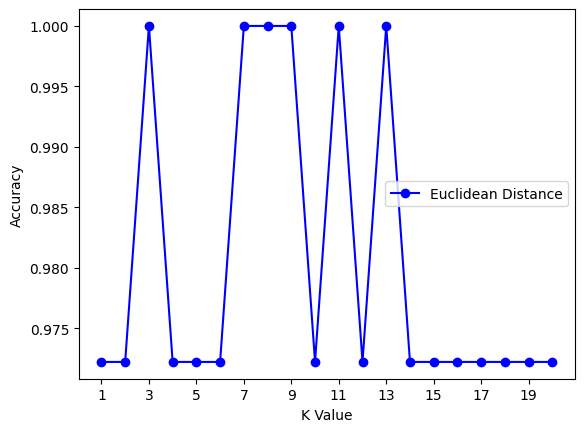

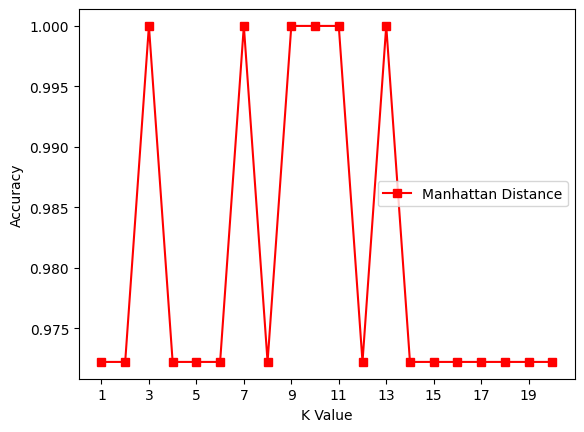

In [111]:
# Plot distances
plt.plot(k_values, euclidean_accuracies, label='Euclidean Distance', marker='o',color='b')
plt.xlabel('K Value')
plt.xticks(np.arange(1, 21, 2))
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(k_values, manhattan_accuracies, label='Manhattan Distance', marker='s',color='r')
plt.xlabel('K Value')
plt.xticks(np.arange(1, 21, 2))
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [81]:
# Confusion Matrix 
label_pred_best = knn(features_train, label_train, features_test, 5, euclidean_distance)
print("Confusion Matrix:")
print(confusion_matrix(label_test, label_pred_best))

Confusion Matrix:
[[13  0  1]
 [ 0 11  4]
 [ 0  2  5]]
